# Analisa Black Market

Data dari kaggle.com
>Analisa Data oleh Hendrik Lesmana

## Task 1 : Import Library dan Membaca Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Task 2 : Cek DataTypes, Cleaning Data, Pengecekkan Keunikan Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.0+ MB


In [4]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
df.fillna(0, inplace=True)

In [6]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

# 3. Explore dan Visualisasi Data

## Task 1: Pelanggan Berdasarkan Golongan Usia

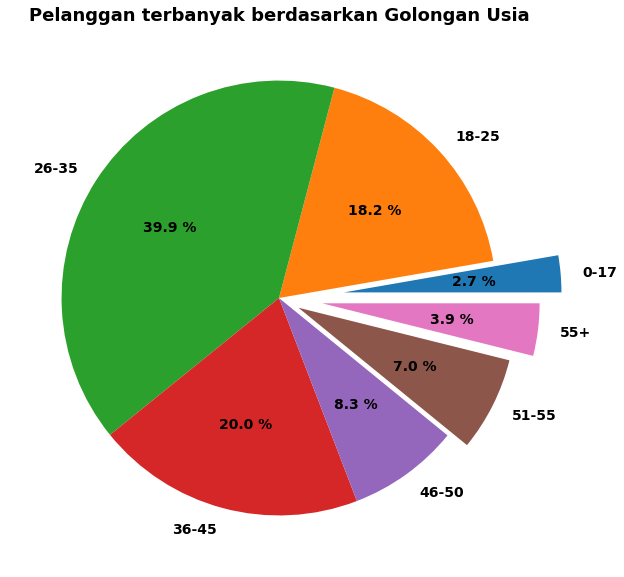

,Golongan Usia,Jumlah
0,0-17,14707
1,18-25,97634
2,26-35,214690
3,36-45,107499
4,46-50,44526
5,51-55,37618
6,55+,20903


In [12]:
plt.figure(figsize=(10,10))
age = df.groupby('Age')['Age'].count()
age = pd.DataFrame({'Golongan Usia':age.index,'Jumlah':age.values})
explode = [.3,0,0,0,0,.1,.2]
plt.pie(age['Jumlah'], labels=age['Golongan Usia'], data=age, autopct='%1.1f %%',explode=explode,
        textprops={'fontsize': 14,'color':'white','fontweight':'bold'})
plt.title('Pelanggan terbanyak berdasarkan Golongan Usia', fontdict={'fontweight':'bold','fontsize':18})
plt.show()
age

> Pada BlackFriday didapatkan bahwa golongan usia 26-35 tahun merupakan golongan usia yang paling banyak dengan 39.9% atau 214,690 pelanggan, lalu golongan usia 0-17 tahun merupakan golongan usia yang paling sedikit dengan 2.7% atau 14,707 pelanggan.

Hipotesis saya adalah golongan usia 0-17 tahun merupakan pelajar yang masih mengandalkan uang jajan, oleh karena itu adalah wajar bila jumlah pembeliannya sedikit.

Sedangkan golongan usia 25-35 tahun merupakan golongan yang ekonominya cukup stabil namun membutuhkan kebutuhan lebih karena sudah mulai tinggal sendiri, namun ada juga yang membeli karena "ingin" seperti video games

### Task 3.1 : Persilangan Antara Jumlah Pendapatan dengan Rata-rata Pembelian Pelanggan

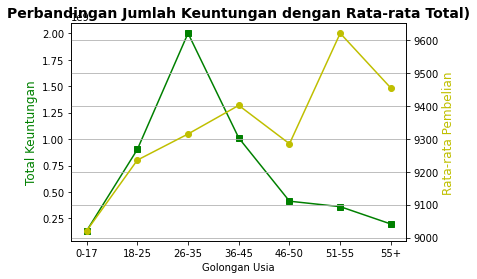

(  Golongan Usia  Jumlah Keuntungan
 0          0-17          132659006
 1         18-25          901669280
 2         26-35         1999749106
 3         36-45         1010649565
 4         46-50          413418223
 5         51-55          361908356
 6           55+          197614842,
   Golongan Usia  Nilai Rata-rata
 0          0-17      9020.126878
 1         18-25      9235.197575
 2         26-35      9314.588970
 3         36-45      9401.478758
 4         46-50      9284.872277
 5         51-55      9620.616620
 6           55+      9453.898579)

In [11]:
rata1 = df.groupby('Age')['Purchase'].sum()
rata2 = df.groupby('Age')['Purchase'].mean()
rata1 = pd.DataFrame({'Golongan Usia':rata1.index,'Jumlah Keuntungan':rata1.values})
rata2 = pd.DataFrame({'Golongan Usia':rata2.index,'Nilai Rata-rata':rata2.values})

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(rata1['Golongan Usia'],rata1['Jumlah Keuntungan'],'gs-')
ax2.plot(rata2['Golongan Usia'],rata2['Nilai Rata-rata'],'yo-')
plt.title('Perbandingan Jumlah Keuntungan dengan Rata-rata Total)', fontdict={'fontweight':'bold','fontsize':14})
ax1.set_xlabel('Golongan Usia')
ax1.set_ylabel('Total Keuntungan', color='g', size=12)
ax2.set_ylabel('Rata-rata Pembelian', color='y', size=12)

plt.grid()
plt.show()
rata1 , rata2

Karena jumlah golongan usia 26-35 adalah yang paling banyak, maka ini masuk akal karena memberikan keuntungan terbesar dengan 1,999,749,106 USD dan golongan usia yang memberikan keuntungan total terendah adalah golongan usia 0-17 tahun dengan 132,659,006 USD

Perbandingannya dilakukan dengan memberikan rata-rata pengeluaran
Pelanggan dengan golongan usia 51-55 dikatakan sedikit namun rata-rata pengeluaran mereka adalah yang tertinggi, dengan 9620.616620 USD dan rata-rata pengeluaran terendah adalah golongan usia 0-17 tahun dengan rata-rata pengeluaran 9020.126878 USD

## Task 3.2: Pelanggan Berdasarkan Jenis Kelamin

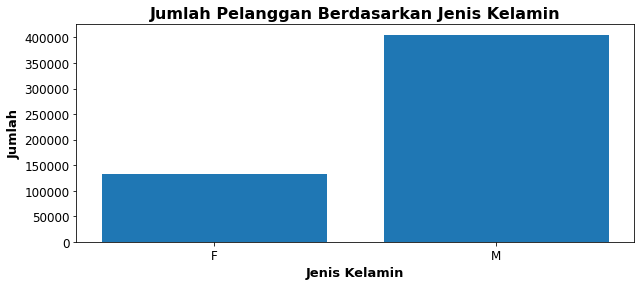

,Jenis Kelamin,Jumlah
0,F,132197
1,M,405380


In [89]:
plt.figure(figsize=(10,4))
jk = df.groupby('Gender')['Gender'].count()
jk = pd.DataFrame({'Jenis Kelamin':jk.index,'Jumlah':jk.values})
plt.bar('Jenis Kelamin', 'Jumlah', data=jk)
plt.title('Jumlah Pelanggan Berdasarkan Jenis Kelamin', fontdict={'fontweight':'bold','fontsize':16})
plt.xlabel('Jenis Kelamin', size=13,weight='bold')
plt.ylabel('Jumlah', size=13,weight='bold')
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()
jk

<Figure size 720x432 with 0 Axes>

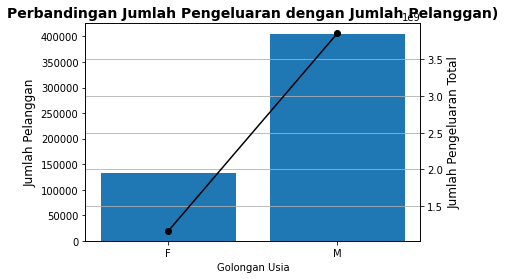

(  Jenis Kelamin  Jumlah
 0             F  132197
 1             M  405380,
   Jenis Kelamin  Jumlah Pengeluaran
 0             F          1164624021
 1             M          3853044357)

In [13]:
plt.figure(figsize=(10,6))
jkp = df.groupby('Gender')['Purchase'].sum()
jkp = pd.DataFrame({'Jenis Kelamin':jkp.index,'Jumlah Pengeluaran':jkp.values})

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(jk['Jenis Kelamin'],jk['Jumlah'])
ax2.plot(jkp['Jenis Kelamin'],jkp['Jumlah Pengeluaran'],'ko-')
plt.title('Perbandingan Jumlah Pengeluaran dengan Jumlah Pelanggan)', fontdict={'fontweight':'bold','fontsize':14})
ax1.set_xlabel('Golongan Usia')
ax1.set_ylabel('Jumlah Pelanggan',size=12)
ax2.set_ylabel('Jumlah Pengeluaran Total', color='k', size=12)
plt.grid()
plt.show()
jk , jkp

Dapat disimpulkan bahwa perbandingan antara pelanggan pria dengan wanita memiliki:
- Perbandingan Jumlah       1:3.06 
- Perbandingan Pengeluaran  1:3.30

#### Berdasarkan https://blackfriday.com/news/black-friday-history menyatakan bahwa "Top Black Friday Products" terdiri dari:
- Clothing (50%)
- home goods/small appliances (39%)
- toys (21%)
- tablets/laptops/PCs (20%)
- TVs (17%)
- gaming consoles/video games (16%)

Belanja pakaian memang secara umumnya terfokuskan pada wanita. Namun faktanya pria juga banyak membeli pakaian.
Dari 6 list kategori di atas dapat diambil bahwa
Pria memenuhi 5 dari 6 list di atas
Wanita memenuhi 4 dari list di atas
Hasil kesimpulan ini didasarkan pada survei pada google

## Task 3.3: Pelanggan Berdasarkan Waktu Kerja

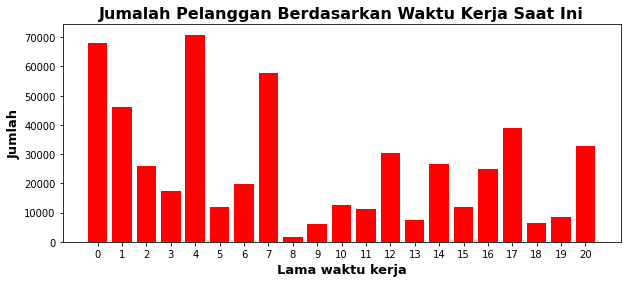

,Lama Kerja,Jumlah
0,0,68120
1,1,45971
2,2,25845
3,3,17366
4,4,70862
5,5,11985
6,6,19822
7,7,57806
8,8,1524
9,9,6153


In [88]:
plt.figure(figsize=(10,4))
kerja = df.groupby('Occupation')['Occupation'].count()
kerja = pd.DataFrame({'Lama Kerja':kerja.index,'Jumlah':kerja.values})
plt.bar('Lama Kerja','Jumlah', data=kerja, color='red')
plt.title('Jumalah Pelanggan Berdasarkan Waktu Kerja Saat Ini', fontdict={'fontweight':'bold','fontsize':16})
plt.xlabel('Lama waktu kerja', size=13,weight='bold')
plt.ylabel('Jumlah', size=13,weight='bold')
waktu = range(0,21)
plt.xticks(waktu)
plt.show()
kerja

> Berdasarkan visualisasi di atas dapat diambil bahwa :
- Pelanggan dengan 4 tahun penetapan pekerjaan saat ini merupakan pelanggan terbanyak, dengan 70,862 pelanggan
- Pelanggan dengan 8 tahun penetapan pekerjaan saat ini merupakan pekanggan tersedikit, dengan 1,524 pelanggan

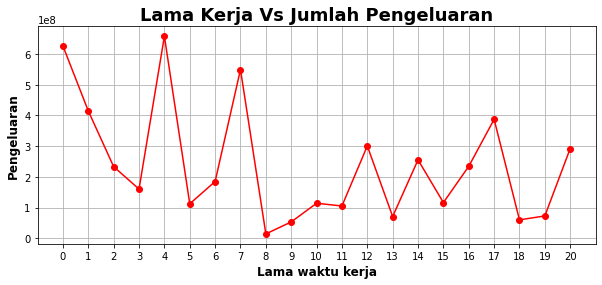

,Lama Kerja,Jumlah Pengeluaran
0,0,625814811
1,1,414552829
2,2,233275393
3,3,160428450
4,4,657530393
5,5,112525355
6,6,185065697
7,7,549282744
8,8,14594599
9,9,53619309


In [87]:
plt.figure(figsize=(10,4))
kerja2 = df.groupby('Occupation')['Purchase'].sum()
kerja2 = pd.DataFrame({'Lama Kerja':kerja2.index,'Jumlah Pengeluaran':kerja2.values})
plt.plot('Lama Kerja','Jumlah Pengeluaran','ro-', data=kerja2)
plt.title('Lama Kerja Vs Jumlah Pengeluaran', fontdict={'fontweight':'bold','fontsize':18})
plt.xlabel('Lama waktu kerja', weight = 'bold', size=12)
plt.ylabel('Pengeluaran', weight = 'bold', size=12)
waktu = range(0,21)
plt.xticks(waktu)
plt.grid()
plt.show()
kerja2

Untuk pengeluaran berdasarkan jumlah penetapan dengan pengeluaran dapat dikatakan berbanding lurus

## Task 3.4: Kategori Kota

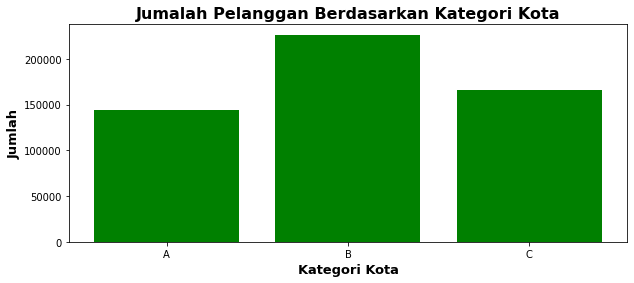

,Kategori Kota,Jumlah
0,A,144638
1,B,226493
2,C,166446


In [86]:
kota = df.groupby('City_Category')['City_Category'].count()
kota = pd.DataFrame({'Kategori Kota':kota.index,'Jumlah':kota.values})
plt.figure(figsize=(10,4))
plt.bar('Kategori Kota','Jumlah', data=kota, color='green')
plt.title('Jumalah Pelanggan Berdasarkan Kategori Kota', fontdict={'fontweight':'bold','fontsize':16})
plt.xlabel('Kategori Kota', size=13,weight='bold')
plt.ylabel('Jumlah', size=13,weight='bold')
plt.show()
kota

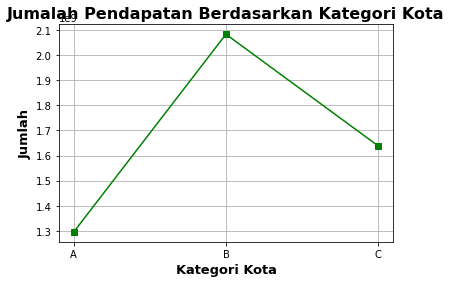

,Kategori Kota,Jumlah
0,A,1295668797
1,B,2083431612
2,C,1638567969


In [17]:
kota = df.groupby('City_Category')['Purchase'].sum()
kota = pd.DataFrame({'Kategori Kota':kota.index,'Jumlah':kota.values})
plt.plot('Kategori Kota','Jumlah','gs-', data=kota)
plt.title('Jumalah Pendapatan Berdasarkan Kategori Kota', fontdict={'fontweight':'bold','fontsize':16})
plt.xlabel('Kategori Kota', size=13,weight='bold')
plt.ylabel('Jumlah', size=13,weight='bold')
plt.grid()
plt.show()
kota

- Kota B memberikan pendapatan terbesar dengan 2,083,431,612 USD
- Kota A memberikan pendapatan terkeceil dengan 1,638,567,969 USD

## Task 3.5: Marital Status

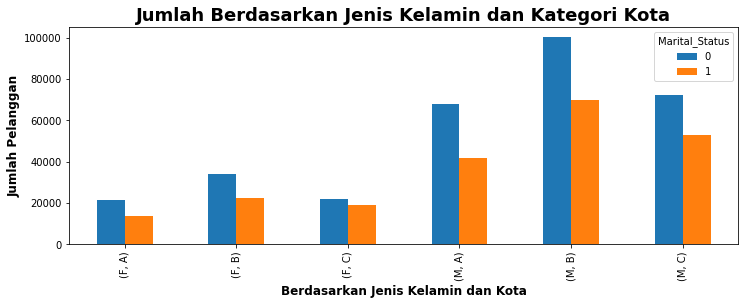

Gender  Marital_Status  City_Category
F       0               A                 21301
                        B                 33897
                        C                 21776
        1               A                 13506
                        B                 22597
                        C                 19120
M       0               A                 68087
                        B                100316
                        C                 72440
        1               A                 41744
                        B                 69683
                        C                 53110
Name: Gender, dtype: int64

In [81]:
marit = df.groupby(['Gender','Marital_Status','City_Category'])['Gender'].count()
marit.unstack(level=1).plot(kind='bar', figsize=(12,4))
plt.title('Jumlah Berdasarkan Jenis Kelamin dan Kategori Kota', fontdict={'fontweight':'bold','fontsize':18})
plt.xlabel('Berdasarkan Jenis Kelamin dan Kota', weight='bold', size=12)
plt.ylabel('Jumlah Pelanggan', weight='bold', size=12)
plt.show()
marit

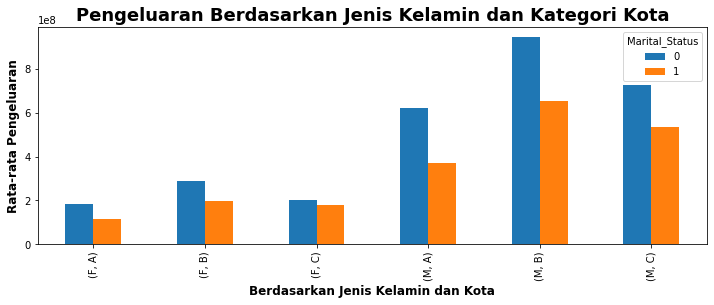

Gender  Marital_Status  City_Category
F       0               A                183927751
                        B                289005064
                        C                200882902
        1               A                116483525
                        B                196307687
                        C                178017092
M       0               A                622462640
                        B                944714325
                        C                725296818
        1               A                372794881
                        B                653404536
                        C                534371157
Name: Purchase, dtype: int64

In [80]:
marits = df.groupby(['Gender','Marital_Status','City_Category'])['Purchase'].sum()
marits.unstack(level=1).plot(kind='bar', figsize=(12,4))
plt.title('Pengeluaran Berdasarkan Jenis Kelamin dan Kategori Kota', fontdict={'fontweight':'bold','fontsize':18})
plt.xlabel('Berdasarkan Jenis Kelamin dan Kota', weight='bold', size=12)
plt.ylabel('Rata-rata Pengeluaran', weight='bold', size=12)
plt.show()
marits

Melalui kedua visualisasi didapat bahwa:
- Laki-laki yang belum menikah di kategori kota B adalah pelanggan terbanyak dengan 100,316 pelanggan
- Perempuan yang sudah menikah di kategori kota A adalah pelanggan terdikit dengan 21,301 pelanggan
- Laki-laki yang belum menikah di kategori kota B mengeluarkan pendapatan rata-rata tertinggi dengan 944,714,325 US Dollar
- Perempuan yang sudah mebikah di kategori kota A mengeluarkan pendapatan rata-rata terendah dengan 183,927,751 US Dollar
- Antara tabel jumlah pelanggan dengan tabel pengeluaran pelanggan adalah berbanding lurus

## Task 3.6: Top 10 Produk dengan Penjualan Terbanyak dan Paling menguntungkan

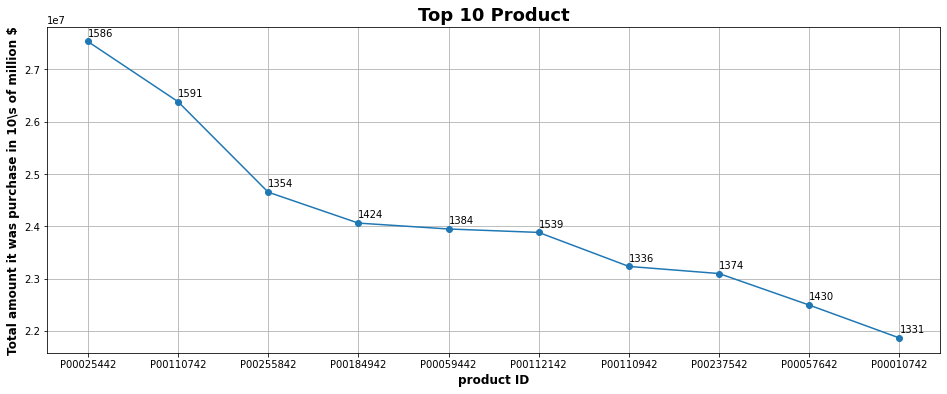

,Product_ID,Purchase,Count
249,P00025442,27532426,1586
1014,P00110742,26382569,1591
2441,P00255842,24652442,1354
1743,P00184942,24060871,1424
581,P00059442,23948299,1384
1028,P00112142,23882624,1539
1016,P00110942,23232538,1336
2261,P00237542,23096487,1374
565,P00057642,22493690,1430
104,P00010742,21865042,1331


In [91]:
data1 = df.groupby('Product_ID').agg({'Purchase':'sum'}).reset_index()
data2 = df['Product_ID'].value_counts()
data2 = pd.DataFrame({'Product_ID':data2.index, 'Count':data2.values})
data = pd.merge(data1,data2,left_on='Product_ID', right_on = 'Product_ID', how = 'left')
data= data.sort_values(['Purchase'],ascending=False)[0:10]
plt.figure(figsize=(16,6))
plt.grid()
plt.plot(data['Product_ID'],data['Purchase'],'o-')
plt.xlabel('product ID', weight='bold', size=12)
plt.ylabel('Total amount it was purchase in 10\s of million $', weight='bold', size=12)
plt.title('Top 10 Product', fontdict={'fontweight':'bold','fontsize':18})
for a,b,c in zip(data['Product_ID'], data['Purchase'], data['Count']):
    plt.text(a, b+100000, str(c))
plt.show()
data

Data menunjukkan bahwa:
1. Produk paling banyak terjual adalah P000110742 dengan jumlah 1591 dengan total penjualan 26,382,569 USD
2. Produk paling banyak menghasilkan keuntungan adalah P00025442 dengan total penjualan 26,382,569 USD
3. Produk P00025442 menghasilkan keuntungan lebih dari P000110742. Dapat disimpulkan bahwa harga P00025442 lebih mahal

# Task 4: Kesimpulan

- Golongan usia 26-35 tahun merupakan golongan usia yang paling banyak dengan 39.9% atau 214,690 pelanggan
- Golongan usia 26-35 memberikan keuntungan terbesar dengan 1,999,749,106 USD
- Perbandingan pengeluaran dan jumlah berdasarkan jenis kelamin adalah 1(perempuan) banding 3(laki-laki)
- Pelanggan dengan 4 tahun penetapan pekerjaan saat ini merupakan pelanggan terbanyak, dengan 70,862 pelanggan
- Kategori kota B memberikan pendapatan terbesar dengan 2,083,431,612 USD dengan 226,493 pelanggan
- Laki-laki yang belum menikah di kategori kota B adalah pelanggan terbanyak dengan 100,316 pelanggan
- Laki-laki yang belum menikah di kategori kota B mengeluarkan pendapatan rata-rata tertinggi dengan 944,714,325 US Dollar
- Produk paling banyak terjual adalah P000110742 dengan jumlah 1591 dengan total penjualan 26,382,569 USD
- Produk paling banyak menghasilkan keuntungan adalah P00025442 dengan total penjualan 26,382,569 USD

Keseluruhannya:
- Keuntungan besar BlackMarket diperoleh dari pelanggan berjenis kelamin laki-laki yang belum menikah dan tinggal di kategori kota B